In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# import statsmodels.api as sm

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel('../sales.xls')
data.head()

,Row_ID,Order_Date,Customer_Name,City,Region,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Temperature,Is_Holiday,Fuel_Price
0,1,2016-11-08,Claire Gute,Henderson,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,42.31,False,2.572
1,2,2016-11-08,Claire Gute,Henderson,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,38.51,False,2.548
2,3,2016-06-12,Darrin Van Huff,Los Angeles,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,39.93,False,2.514
3,4,2015-10-11,Sean O'Donnell,Fort Lauderdale,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,46.63,True,2.561
4,5,2015-10-11,Sean O'Donnell,Fort Lauderdale,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,46.50,False,2.625


In [4]:
set(data['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

# Furniture

In [5]:
df_furniture = data.loc[data['Category'] == 'Furniture']

In [6]:
df_furniture.head()

,Row_ID,Order_Date,Customer_Name,City,Region,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Temperature,Is_Holiday,Fuel_Price
0,1,2016-11-08,Claire Gute,Henderson,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,42.31,False,2.572
1,2,2016-11-08,Claire Gute,Henderson,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,38.51,False,2.548
3,4,2015-10-11,Sean O'Donnell,Fort Lauderdale,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,46.63,True,2.561
5,6,2014-06-09,Brosina Hoffman,Los Angeles,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,57.79,False,2.667
10,11,2014-06-09,Brosina Hoffman,Los Angeles,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,66.32,False,2.808


In [7]:
data.columns

Index(['Row_ID', 'Order_Date', 'Customer_Name', 'City', 'Region', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Temperature', 'Is_Holiday', 'Fuel_Price'],
      dtype='object')

In [8]:
var_column = ['Row_ID', 'Customer_Name', 'City', 'Region', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Discount',
       'Profit', 'Temperature', 'Is_Holiday', 'Fuel_Price']
df_furniture.drop(var_column, axis=1, inplace=True)

F:\anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df_furniture.head()

,Order_Date,Quantity
0,2016-11-08,2
1,2016-11-08,3
3,2015-10-11,5
5,2014-06-09,7
10,2014-06-09,9


In [10]:
df_furniture.sort_values('Order_Date')

,Order_Date,Quantity
7474,2014-01-06,9
7660,2014-01-07,3
866,2014-01-10,1
716,2014-01-11,2
2978,2014-01-13,6
...,...,...
7636,2017-12-29,3
7632,2017-12-29,8
5131,2017-12-29,8
7635,2017-12-29,1


In [11]:
df_furniture.isna().sum()

Order_Date    0
Quantity      0
dtype: int64

In [12]:
df_furniture = df_furniture.groupby('Order_Date')['Quantity'].sum().reset_index()

In [13]:
df_furniture = df_furniture.set_index('Order_Date')

In [14]:
y = df_furniture['Quantity'].resample('MS').mean()
y

Order_Date
2014-01-01     5.384615
2014-02-01     4.600000
2014-03-01     7.705882
2014-04-01     5.785714
2014-05-01     6.062500
2014-06-01     6.421053
2014-07-01     6.333333
2014-08-01     6.687500
2014-09-01     8.666667
2014-10-01     8.125000
2014-11-01    10.363636
2014-12-01    15.600000
2015-01-01     7.333333
2015-02-01     7.500000
2015-03-01     6.937500
2015-04-01     8.230769
2015-05-01     8.400000
2015-06-01     6.222222
2015-07-01     8.526316
2015-08-01     7.000000
2015-09-01    10.789474
2015-10-01     7.368421
2015-11-01    12.916667
2015-12-01    11.681818
2016-01-01     6.733333
2016-02-01     6.272727
2016-03-01     7.714286
2016-04-01     7.684211
2016-05-01     8.227273
2016-06-01     8.000000
2016-07-01     9.352941
2016-08-01     6.764706
2016-09-01    11.833333
2016-10-01     9.842105
2016-11-01    12.720000
2016-12-01    13.192308
2017-01-01     5.733333
2017-02-01     5.461538
2017-03-01     6.150000
2017-04-01     8.750000
2017-05-01     7.360000
2017-

<AxesSubplot:xlabel='Order_Date'>

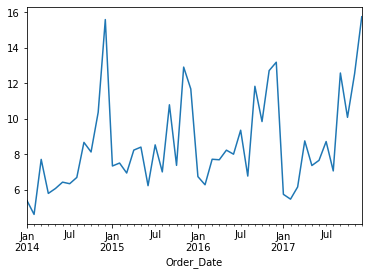

In [15]:
y.plot()

In [16]:
import statsmodels.api as sm

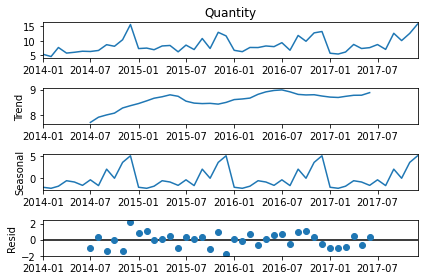

In [17]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [18]:
p = d = q = range(0, 2)
rangePDQ = list(itertools.product(p, d, q))
seasonalPDQ = [(x[0], x[1], x[2], 12) for x in rangePDQ]

print('Parameter Combinations:')
print('{} x {}'.format(rangePDQ[1], seasonalPDQ[1]))
print('{} x {}'.format(rangePDQ[2], seasonalPDQ[2]))

Parameter Combinations:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [19]:
for p in rangePDQ:
    for seasonalp in seasonalPDQ:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=p, seasonal_order=seasonalp, enforce_stationarity=False,
                                            enforce_invertibility=False)
            modelResults = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(p, seasonalp, modelResults.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:342.10305927042725
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1321.1170247265954
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:131.2987370130599


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
F:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:74.42256034058184
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:136.09982485334967
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1367.9294309257614
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:76.85318058726884
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:75.61608348630585
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:296.9593547106127
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1444.9101778187983
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:126.65423739679343
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:73.4985045009795


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:137.85075751527737
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1329.2270575424939
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:78.40968227455693
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:74.73391293515674
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:230.5517981307123
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1480.6115557033788
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:152.73703497237543
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:75.10745115402553
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:152.52111265311635


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1565.4006463767184
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:80.14626710387452
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:79.68304321167233
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:218.06732041535258


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1479.6289960356376
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:125.21112708168877
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:70.24877044527949
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:134.53936515495676


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1450.3767897540524
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:77.04568522394534
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:71.93524982366895
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:236.34467284172135
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1140.328323452942
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:133.24171841354257


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:74.28020670780315
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:133.67888882763583


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1022.1276916958803
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:75.92408687457056
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:77.2253361361123
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:224.8170814512576
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1417.584483549763
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:126.51972129715952
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:73.4527699546897
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:129.32884549618737


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1302.865377848823
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:77.21349092158027
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:76.36317298729418
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:225.09143427331455
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1340.0904364342687
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:131.54125731955236
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:73.50408054949168


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:131.83867397950962
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1310.1180609492412


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:75.56498740932176
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:77.56152124157069
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:218.01337769393643


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1503.581245998475
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:123.28387429910137
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:72.19667742405973
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:131.1822503531364
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1474.3308107037994
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:76.46031437852207
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:75.638182126619


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [20]:
model = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
modelResults = model.fit()
print(modelResults.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9363      0.135     -6.917      0.000      -1.202      -0.671
ma.S.L12      -0.2678      0.258     -1.037      0.300      -0.774       0.239
sigma2         1.2226      0.455      2.684      0.007       0.330       2.115


            lower Quantity  upper Quantity
Order_Date                                
2017-01-01        5.504412        9.876849
2017-02-01        4.934502        9.306031
2017-03-01        5.957358       10.323881
2017-04-01        5.914631       10.276895
2017-05-01        6.416296       10.774923
2017-06-01        5.748511       10.104020
2017-07-01        7.177152       11.529979
2017-08-01        4.952793        9.303309
2017-09-01        9.555808       13.904328
2017-10-01        7.435376       11.782168
2017-11-01       10.837699       15.182994
2017-12-01       11.255441       15.599435


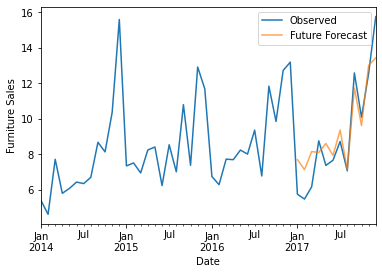

In [21]:
predictions = modelResults.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = predictions.conf_int()
print(pred_ci)
trace = y['2014':].plot(label='Observed')
predictions.predicted_mean.plot(ax=trace, label='Future Forecast', alpha=.7)
trace.set_xlabel('Date')
trace.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [22]:
y_predicted = predictions.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error:', mse)
print('Root Mean Square Error:', np.sqrt(mse))

Mean Square Error: 1.6325060884168552
Root Mean Square Error: 1.277695616497472


In [23]:
actual, pred = np.array(y_true), np.array(y_predicted)
print(actual)
print(pred)

[ 5.73333333  5.46153846  6.15        8.75        7.36        7.65217391
  8.71428571  7.05555556 12.58333333 10.08       12.55172414 15.76      ]
[ 7.69063077  7.12026655  8.14061952  8.09576327  8.5956094   7.92626551
  9.35356572  7.12805097 11.73006802  9.60877205 13.01034604 13.42743782]


In [24]:
np.mean(np.abs((actual - pred) / actual)) * 100

13.583207753615179

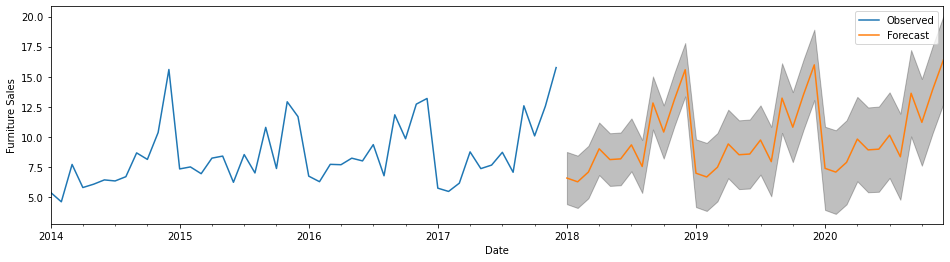

In [25]:
futurePred = modelResults.get_forecast(steps=36)
predCi = futurePred.conf_int()
ax = y.plot(label='Observed', figsize=(16, 4))
futurePred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(predCi.index,
                predCi.iloc[:, 0],
                predCi.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [26]:
import json

In [27]:
y_forecasted = futurePred.predicted_mean
y_forecasted_dic = dict(zip(y_forecasted.index.strftime("%Y-%m-%d"),y_forecasted.values))
print(y_forecasted_dic)
with open("furniture_forecast.json", "w") as outfile: 
    json.dump(y_forecasted_dic, outfile) 

{'2018-01-01': 6.574035226294077, '2018-02-01': 6.261489952282491, '2018-03-01': 7.073981206550934, '2018-04-01': 9.006979989975829, '2018-05-01': 8.109746959843214, '2018-06-01': 8.168896841532133, '2018-07-01': 9.334092279234413, '2018-08-01': 7.5358204112144005, '2018-09-01': 12.817115237021692, '2018-10-01': 10.400199532730548, '2018-11-01': 13.112198721993376, '2018-12-01': 15.581567263731941, '2019-01-01': 6.9779310040645015, '2019-02-01': 6.665385730052914, '2019-03-01': 7.477876984321357, '2019-04-01': 9.410875767746251, '2019-05-01': 8.513642737613637, '2019-06-01': 8.572792619302556, '2019-07-01': 9.737988057004836, '2019-08-01': 7.939716188984823, '2019-09-01': 13.221011014792115, '2019-10-01': 10.80409531050097, '2019-11-01': 13.516094499763799, '2019-12-01': 15.985463041502364, '2020-01-01': 7.381826781834924, '2020-02-01': 7.069281507823336, '2020-03-01': 7.88177276209178, '2020-04-01': 9.814771545516674, '2020-05-01': 8.91753851538406, '2020-06-01': 8.976688397072978, '2

# Office Supplies

In [28]:
df_offsup = data.loc[data['Category'] == 'Office Supplies']
df_offsup.head()

,Row_ID,Order_Date,Customer_Name,City,Region,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Temperature,Is_Holiday,Fuel_Price
2,3,2016-06-12,Darrin Van Huff,Los Angeles,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,39.93,False,2.514
4,5,2015-10-11,Sean O'Donnell,Fort Lauderdale,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,46.50,False,2.625
6,7,2014-06-09,Brosina Hoffman,Los Angeles,West,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,54.58,False,2.720
8,9,2014-06-09,Brosina Hoffman,Los Angeles,West,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,62.27,True,2.719
9,10,2014-06-09,Brosina Hoffman,Los Angeles,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,65.86,False,2.770


In [29]:
var_column = ['Row_ID', 'Customer_Name', 'City', 'Region', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Discount',
       'Profit', 'Temperature', 'Is_Holiday', 'Fuel_Price']
df_offsup.drop(var_column, axis=1, inplace=True)

F:\anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
df_offsup.head()
df_offsup.sort_values('Order_Date')

,Order_Date,Quantity
7980,2014-01-03,2
740,2014-01-04,3
739,2014-01-04,3
741,2014-01-04,2
1759,2014-01-05,3
...,...,...
5091,2017-12-30,3
1297,2017-12-30,2
908,2017-12-30,3
1296,2017-12-30,2


In [31]:
df_offsup.isna().sum()

Order_Date    0
Quantity      0
dtype: int64

In [32]:
df_offsup = df_offsup.groupby('Order_Date')['Quantity'].sum().reset_index()

In [33]:
df_offsup = df_offsup.set_index('Order_Date')
y = df_offsup['Quantity'].resample('MS').mean()
y

Order_Date
2014-01-01     9.941176
2014-02-01     6.058824
2014-03-01    16.818182
2014-04-01    14.375000
2014-05-01    12.772727
2014-06-01    14.636364
2014-07-01    16.650000
2014-08-01    17.904762
2014-09-01    23.111111
2014-10-01    12.296296
2014-11-01    26.464286
2014-12-01    22.038462
2015-01-01     7.857143
2015-02-01     9.312500
2015-03-01    13.652174
2015-04-01    11.920000
2015-05-01    14.480000
2015-06-01    15.578947
2015-07-01    12.739130
2015-08-01    17.619048
2015-09-01    27.400000
2015-10-01    14.791667
2015-11-01    28.535714
2015-12-01    22.800000
2016-01-01    11.562500
2016-02-01     9.684211
2016-03-01    11.480000
2016-04-01    17.739130
2016-05-01    17.965517
2016-06-01    19.600000
2016-07-01    21.500000
2016-08-01    17.038462
2016-09-01    29.785714
2016-10-01    19.375000
2016-11-01    31.500000
2016-12-01    29.892857
2017-01-01    17.954545
2017-02-01    11.684211
2017-03-01    20.629630
2017-04-01    17.333333
2017-05-01    20.148148
2017-

<AxesSubplot:xlabel='Order_Date'>

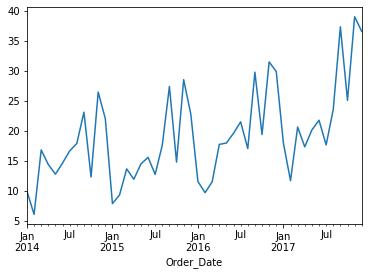

In [34]:
y.plot()

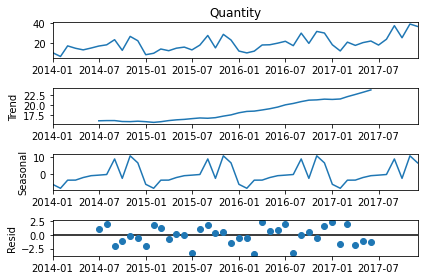

In [35]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [36]:
p = d = q = range(0, 2)
rangePDQ = list(itertools.product(p, d, q))
seasonalPDQ = [(x[0], x[1], x[2], 12) for x in rangePDQ]

print('Parameter Combinations:')
print('{} x {}'.format(rangePDQ[1], seasonalPDQ[1]))
print('{} x {}'.format(rangePDQ[2], seasonalPDQ[2]))

Parameter Combinations:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [37]:
for p in rangePDQ:
    for seasonalp in seasonalPDQ:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=p, seasonal_order=seasonalp, enforce_stationarity=False,
                                            enforce_invertibility=False)
            modelResults = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(p, seasonalp, modelResults.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:420.306699838906
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1456.9683625098105
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:206.48189470708516
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:144.12656129040127


F:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:196.69242590242058
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1007.3781561102365


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:149.59253669208016
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:145.81024449006705
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:376.96675422084115


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1650.3621595900386
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:195.93749301540174
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:135.6934043651074
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:198.61718905049727


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1452.9095784539772
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:146.67605071797186
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:138.096238092549
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:320.4584073464301


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1222.2338723497305
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:200.48223338873058
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:126.3465594021419
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:206.7028096900757
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1488.6474037570438
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:132.03033630182594
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:125.60300985414399
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:302.51984282213886


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1222.8898121635395
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:178.71113827984374
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:114.47010558721226
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:192.45905100555558
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1193.5217270953606
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:125.42221324712277
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:114.15460105309573
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:328.1116685739828


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1426.7605883447438
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:199.24106977574462
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:132.0641014563298
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:193.25083983147138


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1223.4163219955228
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:132.95497346005897
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:131.85004070967776
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:311.4715391791111
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1412.1946664927095
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:185.2339421369003


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:120.78909423911165
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:192.31736916465374


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1214.7761049109617
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:124.04656584574194
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:120.2875071105749
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:312.69453279812063
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1405.2232416948939
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:192.9318195999163
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:124.56012826974575


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:193.60766980873026
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1371.1532907077344


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:123.01302261086495
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:122.95410945381158
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:304.5194587977894


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1257.102595459342
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:180.69697251887476
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:116.42778138954058
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:188.21335967146098
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1223.7458568291247


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:122.66625575347982
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:115.96426957427289


In [38]:
model = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
modelResults = model.fit()
print(modelResults.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5854      0.291     -2.011      0.044      -1.156      -0.015
ar.S.L12      -0.6733      0.336     -2.001      0.045      -1.333      -0.014
ma.S.L12      -0.1905      0.699     -0.273      0.785      -1.560       1.179
sigma2         9.0023      7.076      1.272      0.203      -4.866      22.871


            lower Quantity  upper Quantity
Order_Date                                
2017-01-01        8.850252       20.755930
2017-02-01       10.562797       22.377582
2017-03-01       13.342735       25.127166
2017-04-01       13.249971       25.024090
2017-05-01       14.214283       25.984879
2017-06-01       15.505155       27.274545
2017-07-01       14.100903       25.869880
2017-08-01       16.230661       27.999497
2017-09-01       26.475312       38.244099
2017-10-01       16.475002       28.243773
2017-11-01       31.166882       42.935647
2017-12-01       27.005996       38.774759


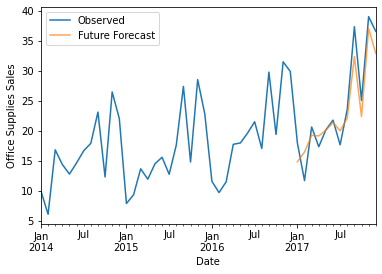

In [39]:
predictions = modelResults.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = predictions.conf_int()
print(pred_ci)
trace = y['2014':].plot(label='Observed')
predictions.predicted_mean.plot(ax=trace, label='Future Forecast', alpha=.7)
trace.set_xlabel('Date')
trace.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

In [40]:
y_predicted = predictions.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error:', mse)
print('Root Mean Square Error:', np.sqrt(mse))

Mean Square Error: 7.9759723948562815
Root Mean Square Error: 2.8241764100098776


In [41]:
actual, pred = np.array(y_true), np.array(y_predicted)
print(actual)
print(pred)
print("MAPE",np.mean(np.abs((actual - pred) / actual)) * 100)

[17.95454545 11.68421053 20.62962963 17.33333333 20.14814815 21.76923077
 17.65384615 23.57692308 37.35714286 25.07692308 39.03571429 36.5862069 ]
[14.8030906  16.47018989 19.23495035 19.13703019 20.09958069 21.38984966
 19.98539133 22.11507891 32.35970569 22.35938758 37.0512648  32.89037782]
MAPE 11.372562847730348


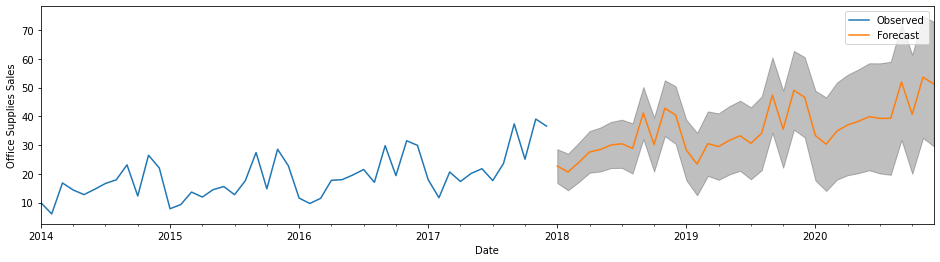

In [42]:
futurePred = modelResults.get_forecast(steps=36)
predCi = futurePred.conf_int()
ax = y.plot(label='Observed', figsize=(16, 4))
futurePred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(predCi.index,
                predCi.iloc[:, 0],
                predCi.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

In [43]:
y_forecasted = futurePred.predicted_mean
y_forecasted.head(36)

2018-01-01    22.687304
2018-02-01    20.627685
2018-03-01    23.965194
2018-04-01    27.600319
2018-05-01    28.462478
2018-06-01    30.025799
2018-07-01    30.446234
2018-08-01    28.839919
2018-09-01    41.136570
2018-10-01    30.154572
2018-11-01    42.803850
2018-12-01    40.439250
2019-01-01    28.272021
2019-02-01    23.377511
2019-03-01    30.490581
2019-04-01    29.459082
2019-05-01    31.635879
2019-06-01    33.238089
2019-07-01    30.604754
2019-08-01    34.067650
2019-09-01    47.363123
2019-10-01    35.507089
2019-11-01    49.038005
2019-12-01    46.616241
2020-01-01    33.283151
2020-02-01    30.297249
2020-03-01    34.868400
2020-04-01    36.978735
2020-05-01    38.270444
2020-06-01    39.846471
2020-07-01    39.269106
2020-08-01    39.319124
2020-09-01    51.942133
2020-10-01    40.674550
2020-11-01    53.611897
2020-12-01    51.228620
Freq: MS, Name: predicted_mean, dtype: float64

In [44]:
y_forecasted_dic = dict(zip(y_forecasted.index.strftime("%Y-%m-%d"),y_forecasted.values))
print(y_forecasted_dic)
with open("office_forecast.json", "w") as outfile: 
    json.dump(y_forecasted_dic, outfile)

{'2018-01-01': 22.68730353350482, '2018-02-01': 20.627684534904894, '2018-03-01': 23.965194275158392, '2018-04-01': 27.600319111819662, '2018-05-01': 28.462478295841848, '2018-06-01': 30.025799101294073, '2018-07-01': 30.44623360493307, '2018-08-01': 28.839919033522058, '2018-09-01': 41.13656958652662, '2018-10-01': 30.154571804867352, '2018-11-01': 42.803849616426156, '2018-12-01': 40.439250325732736, '2019-01-01': 28.27202082380085, '2019-02-01': 23.377510531402834, '2019-03-01': 30.490580935314426, '2019-04-01': 29.459082387292188, '2019-05-01': 31.635879400137608, '2019-06-01': 33.23808871552049, '2019-07-01': 30.6047541343631, '2019-08-01': 34.067650298618645, '2019-09-01': 47.36312327428638, '2019-10-01': 35.5070892710813, '2019-11-01': 49.03800531019266, '2019-12-01': 46.616241101906645, '2020-01-01': 33.2831511537669, '2020-02-01': 30.29724946426718, '2020-03-01': 34.86839962623264, '2020-04-01': 36.978734967213015, '2020-05-01': 38.27044369632889, '2020-06-01': 39.846471074940

# Technology

In [45]:
df_tech = data.loc[data['Category'] == 'Technology']
df_tech.head()

,Row_ID,Order_Date,Customer_Name,City,Region,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Temperature,Is_Holiday,Fuel_Price
7,8,2014-06-09,Brosina Hoffman,Los Angeles,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,51.45,False,2.732
11,12,2014-06-09,Brosina Hoffman,Los Angeles,West,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568,64.84,False,2.795
19,20,2014-08-27,Zuschuss Donatelli,San Francisco,West,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110,84.11,False,2.637
26,27,2016-01-16,Eric Hoffmann,Los Angeles,West,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741,87.16,False,2.627
35,36,2016-12-08,Gene Hale,Richardson,Central,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,63.93,False,2.633


In [46]:
var_column = ['Row_ID', 'Customer_Name', 'City', 'Region', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Discount',
       'Profit', 'Temperature', 'Is_Holiday', 'Fuel_Price']
df_tech.drop(var_column, axis=1, inplace=True)

F:\anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df_tech.head()
df_tech.sort_values('Order_Date')

,Order_Date,Quantity
7478,2014-01-06,4
7477,2014-01-06,2
593,2014-01-09,3
765,2014-01-13,6
1913,2014-01-15,5
...,...,...
4924,2017-12-25,2
2569,2017-12-27,2
573,2017-12-28,3
1878,2017-12-29,3


Order_Date
2014-01-01     6.428571
2014-02-01     4.714286
2014-03-01     5.250000
2014-04-01     7.333333
2014-05-01     5.176471
2014-06-01     7.000000
2014-07-01     6.866667
2014-08-01     9.692308
2014-09-01    11.200000
2014-10-01     5.550000
2014-11-01    10.000000
2014-12-01    10.777778
2015-01-01     7.600000
2015-02-01     5.625000
2015-03-01     5.000000
2015-04-01     8.625000
2015-05-01     6.214286
2015-06-01     5.200000
2015-07-01     6.800000
2015-08-01     8.285714
2015-09-01     9.800000
2015-10-01     7.555556
2015-11-01     8.739130
2015-12-01    11.909091
2016-01-01     4.800000
2016-02-01     5.300000
2016-03-01     6.842105
2016-04-01     4.764706
2016-05-01     8.944444
2016-06-01     7.750000
2016-07-01     7.875000
2016-08-01     6.750000
2016-09-01     9.900000
2016-10-01     7.187500
2016-11-01    10.760000
2016-12-01    10.173913
2017-01-01     8.285714
2017-02-01     5.000000
2017-03-01     8.541667
2017-04-01     6.000000
2017-05-01     7.950000
2017-

<AxesSubplot:xlabel='Order_Date'>

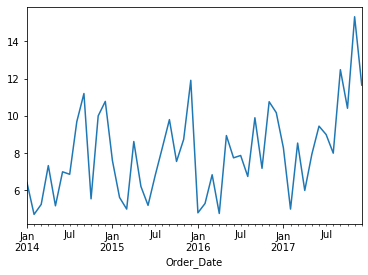

In [48]:
df_tech.isna().sum()
df_tech = df_tech.groupby('Order_Date')['Quantity'].sum().reset_index()
df_tech = df_tech.set_index('Order_Date')
y = df_tech['Quantity'].resample('MS').mean()
print(y)
y.plot()

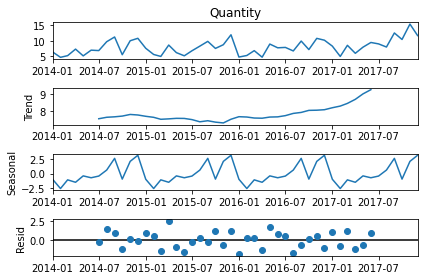

In [49]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [50]:
p = d = q = range(0, 2)
rangePDQ = list(itertools.product(p, d, q))
seasonalPDQ = [(x[0], x[1], x[2], 12) for x in rangePDQ]

print('Parameter Combinations:')
print('{} x {}'.format(rangePDQ[1], seasonalPDQ[1]))
print('{} x {}'.format(rangePDQ[2], seasonalPDQ[2]))

Parameter Combinations:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [51]:
for p in rangePDQ:
    for seasonalp in seasonalPDQ:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=p, seasonal_order=seasonalp, enforce_stationarity=False,
                                            enforce_invertibility=False)
            modelResults = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(p, seasonalp, modelResults.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:335.2798744002405
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1219.4500418708174
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:147.796979768055
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:103.6347876750137
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:151.07647815950713


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
F:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1315.0111765675927
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:108.49586168634795
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:105.5236555824467
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:291.706657043506
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1250.72741380654
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:146.36590850894058
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:101.83833411903495
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:152.9640506864256
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1134.7483720933537
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:110.03740548608386
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:103.58809630105984
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:225.05739986017156
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1051.9754456122203
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:166.38150586068963


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:110.90180290713812
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:163.14992900712988
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1475.1683636330708
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:116.01443115919932
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:111.52807168633456
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:207.02046688462875


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1611.458811668559
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:139.7630715584566
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:93.31643274152141
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:143.98711157193443


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1686.8061543650258
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:103.85339495865084
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:95.16266537597492
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:230.61949214607156


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1066.1051136884416
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:149.71474043985873
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:104.89666957984026
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:149.65400705271287


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:946.6067280656076
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:105.10446570250652
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:106.6600238144241
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:211.76263127893026


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1142.914964599055
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:144.9551896298797
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:98.58556012519576
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:142.08605917876406


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1026.8205370219234
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:105.05885944054498
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:101.16582351511872
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:215.1713401021567
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1321.8681167175102
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:149.6359263256687
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:103.35157679385023


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:142.93090879683152
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1399.7830076299801


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:103.41956699066805
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:102.8724869152284
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:209.01686937560584


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1273.1896736049328
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:138.8268879033982
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:93.57718328182652
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:139.85579113556133
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1348.111785966293
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:99.84896888428182
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:95.15766760070343


F:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [52]:
model = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
modelResults = model.fit()
print(modelResults.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8272      0.158     -5.237      0.000      -1.137      -0.518
ma.S.L12      -0.2753      0.325     -0.846      0.397      -0.913       0.362
sigma2         3.7211      1.471      2.529      0.011       0.838       6.604


            lower Quantity  upper Quantity
Order_Date                                
2017-01-01        1.752958        9.336980
2017-02-01        2.054991        9.631597
2017-03-01        2.939021       10.511344
2017-04-01        2.633890       10.203299
2017-05-01        4.955009       12.522431
2017-06-01        3.872389       11.438455
2017-07-01        4.591469       12.156608
2017-08-01        4.383911       11.948417
2017-09-01        7.057039       14.621113
2017-10-01        4.518080       12.081857
2017-11-01        8.030109       15.593684
2017-12-01        8.911339       16.474775


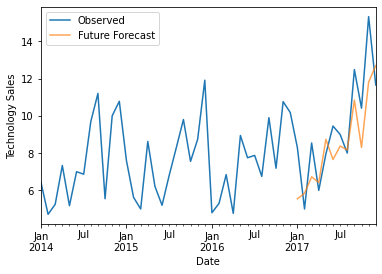

In [53]:
predictions = modelResults.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = predictions.conf_int()
print(pred_ci)
trace = y['2014':].plot(label='Observed')
predictions.predicted_mean.plot(ax=trace, label='Future Forecast', alpha=.7)
trace.set_xlabel('Date')
trace.set_ylabel('Technology Sales')
plt.legend()
plt.show()

In [54]:
y_predicted = predictions.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error:', mse)
print('Root Mean Square Error:', np.sqrt(mse))

Mean Square Error: 3.0409126474316817
Root Mean Square Error: 1.743821277376693


In [55]:
actual, pred = np.array(y_true), np.array(y_predicted)
print(actual)
print(pred)
print("MAPE",np.mean(np.abs((actual - pred) / actual)) * 100)

[ 8.28571429  5.          8.54166667  6.          7.95        9.45
  9.          8.         12.48       10.40909091 15.32       11.65217391]
[ 5.54496886  5.84329376  6.72518268  6.41859458  8.73872021  7.6554217
  8.37403843  8.16616369 10.83907591  8.29996836 11.8118966  12.69305722]
MAPE 15.114378480495668


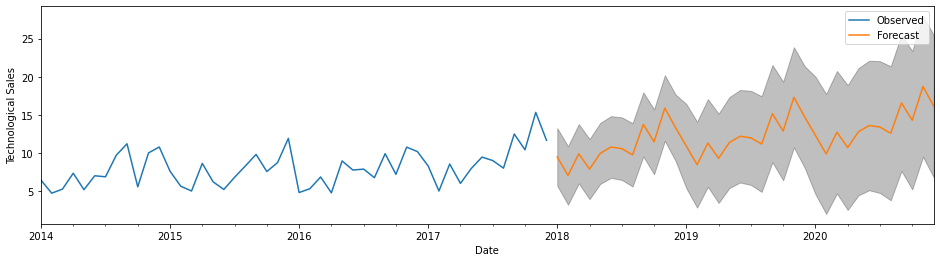

In [56]:
futurePred = modelResults.get_forecast(steps=36)
predCi = futurePred.conf_int()
ax = y.plot(label='Observed', figsize=(16, 4))
futurePred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(predCi.index,
                predCi.iloc[:, 0],
                predCi.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technological Sales')
plt.legend()
plt.show()

In [57]:
y_forecasted = futurePred.predicted_mean
y_forecasted.head(36)

2018-01-01     9.470882
2018-02-01     7.039121
2018-03-01     9.889703
2018-04-01     7.875678
2018-05-01     9.947578
2018-06-01    10.774463
2018-07-01    10.560390
2018-08-01     9.748516
2018-09-01    13.739196
2018-10-01    11.461361
2018-11-01    15.886987
2018-12-01    13.303984
2019-01-01    10.885787
2019-02-01     8.454026
2019-03-01    11.304607
2019-04-01     9.290583
2019-05-01    11.362482
2019-06-01    12.189368
2019-07-01    11.975294
2019-08-01    11.163420
2019-09-01    15.154101
2019-10-01    12.876265
2019-11-01    17.301891
2019-12-01    14.718889
2020-01-01    12.300691
2020-02-01     9.868931
2020-03-01    12.719512
2020-04-01    10.705488
2020-05-01    12.777387
2020-06-01    13.604273
2020-07-01    13.390199
2020-08-01    12.578325
2020-09-01    16.569006
2020-10-01    14.291170
2020-11-01    18.716796
2020-12-01    16.133794
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
y_forecasted_dic = dict(zip(y_forecasted.index.strftime("%Y-%m-%d"),y_forecasted.values))
print(y_forecasted_dic)
with open("tech_forecast.json", "w") as outfile: 
    json.dump(y_forecasted_dic, outfile)

{'2018-01-01': 9.47088195918464, '2018-02-01': 7.039121334160791, '2018-03-01': 9.889702735408223, '2018-04-01': 7.875678432104304, '2018-05-01': 9.947577868391082, '2018-06-01': 10.774463482790951, '2018-07-01': 10.560389540409748, '2018-08-01': 9.748515770334699, '2018-09-01': 13.739196350376803, '2018-10-01': 11.461360888160687, '2018-11-01': 15.886986714899354, '2018-12-01': 13.303984366466711, '2019-01-01': 10.885786563847812, '2019-02-01': 8.454025938823964, '2019-03-01': 11.304607340071396, '2019-04-01': 9.290583036767476, '2019-05-01': 11.362482473054254, '2019-06-01': 12.189368087454122, '2019-07-01': 11.975294145072919, '2019-08-01': 11.16342037499787, '2019-09-01': 15.154100955039976, '2019-10-01': 12.876265492823858, '2019-11-01': 17.301891319562525, '2019-12-01': 14.71888897112988, '2020-01-01': 12.300691168510983, '2020-02-01': 9.868930543487135, '2020-03-01': 12.719511944734567, '2020-04-01': 10.705487641430647, '2020-05-01': 12.777387077717425, '2020-06-01': 13.60427269

In [4]:
np.mean([13.583207753615179,11.372562847730348,15.114378480495668])

13.356716360613731